In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [794]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Index:
* [Preprocessing](#first-bullet)
* [Model Building](#second-bullet)

In [2383]:
df = pd.read_csv('train_wn75k28.csv')

In [2145]:
df.shape

(39161, 19)

In [2146]:
df.head(3)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0


## EDA

In [1771]:
# Target frequency

In [1770]:
df['buy'].value_counts(normalize=True)

0    0.94898
1    0.05102
Name: buy, dtype: float64

In [1772]:
# We can observe it is an imbalanced dataset

In [1773]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [1774]:
# Null values
df.isna().sum().sort_values(ascending=False)[:3]

products_purchased    20911
signup_date           15113
id                        0
dtype: int64

In [1775]:
df.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [1776]:
df.describe(exclude='number')

,created_at,signup_date
count,39161,24048
unique,365,1800
top,2021-12-26,2021-07-18
freq,181,45


In [1777]:
print(df.groupby('campaign_var_1')['buy'].agg(['count', 'mean']),'\n')
print(df.groupby('campaign_var_2')['buy'].agg(['count', 'mean']),'\n')
print(df.groupby('products_purchased')['buy'].agg(['count', 'mean']),'\n')

                count      mean
campaign_var_1                 
1                1593  0.060891
2                3486  0.071429
3                3784  0.072939
4                4018  0.068940
5                4060  0.065764
6                4061  0.056144
7                3756  0.052982
8                3407  0.044614
9                2866  0.035939
10               2392  0.025502
11               1873  0.025627
12               1455  0.016495
13               1059  0.011331
14                714  0.002801
15                456  0.006579
16                181  0.000000 

                count      mean
campaign_var_2                 
1                 589  0.037351
2                1788  0.058166
3                2883  0.058966
4                4213  0.077854
5                5250  0.072381
6                5744  0.063545
7                5472  0.053545
8                4690  0.040299
9                3537  0.028838
10               2298  0.014795
11               1410  0.004965
12    

In [1778]:
for col in df.iloc[:,6:].columns:
    print(df.groupby(col)['buy'].agg(['count', 'mean']),'\n')

                     count      mean
user_activity_var_1                 
0                    23869  0.044283
1                    14917  0.059395
2                      374  0.147059
3                        1  0.000000 

                     count      mean
user_activity_var_2                 
0                    38898  0.044604
1                      263  1.000000 

                     count      mean
user_activity_var_3                 
0                    35134  0.050635
1                     4027  0.054383 

                     count      mean
user_activity_var_4                 
0                    38712  0.041667
1                      449  0.857461 

                     count      mean
user_activity_var_5                 
0                    33244  0.036097
1                     5901  0.132520
2                       16  1.000000 

                     count      mean
user_activity_var_6                 
0                    20777  0.052895
1                    17209  

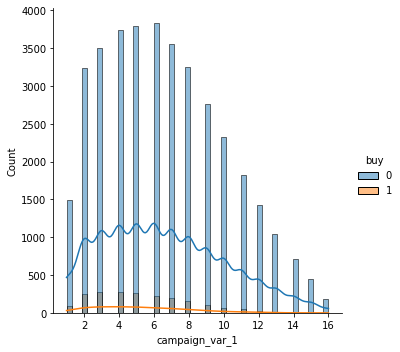

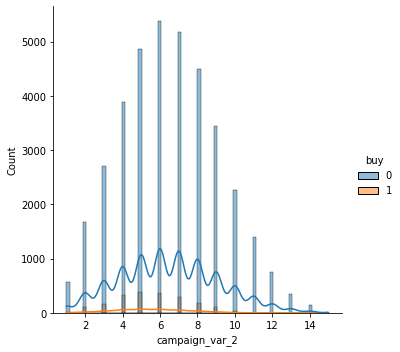

In [1781]:
sns.displot(x=df['campaign_var_1'], hue=df['buy'], kde=True)
sns.displot(x=df['campaign_var_2'], hue=df['buy'], kde=True)

<AxesSubplot:xlabel='products_purchased', ylabel='campaign_var_2'>

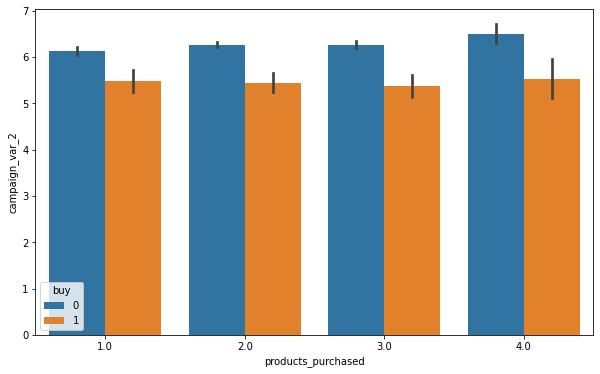

In [1788]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, y='campaign_var_2', x='products_purchased', hue='buy')

In [1785]:
created = pd.to_datetime(df['created_at'])
signup = pd.to_datetime(df['signup_date'])

In [1787]:
# imp - When user is not signed up, chances of buying product are very small
df.loc[signup.isna(), 'buy'].mean()

0.0016542049890822471

In [819]:
df.loc[~df['products_purchased'].isna(), 'buy'].mean()

0.05221917808219178

<AxesSubplot:ylabel='Density'>

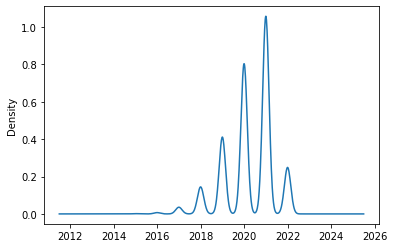

In [1789]:
# signups have been mainly 2020 and 2021
signup.dt.year.plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

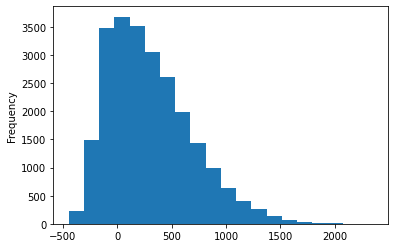

In [1796]:
(created-signup).dt.days.plot(kind='hist', bins=20)

In [2382]:
for col in test_df.iloc[:,2:].columns:
    print(test_df[col].value_counts(),'\n')

0.0    8136
2.0    2484
3.0    1260
1.0    1106
4.0     198
Name: products_purchased, dtype: int64 

0    8207
1    4857
2     120
Name: user_activity_var_1, dtype: int64 

0    13128
1       56
Name: user_activity_var_2, dtype: int64 

0    11822
1     1362
Name: user_activity_var_3, dtype: int64 

0    13090
1       94
Name: user_activity_var_4, dtype: int64 

0    11169
1     2015
Name: user_activity_var_5, dtype: int64 

0    6713
1    6019
2     447
3       5
Name: user_activity_var_6, dtype: int64 

0    9187
1    3980
2      17
Name: user_activity_var_7, dtype: int64 

0    11304
1     1879
2        1
Name: user_activity_var_8, dtype: int64 

0    13074
1      109
2        1
Name: user_activity_var_9, dtype: int64 

0    13181
1        3
Name: user_activity_var_10, dtype: int64 

0    9995
1    3049
2     140
Name: user_activity_var_11, dtype: int64 

1    6649
0    6535
Name: signup_na, dtype: int64 

1    8136
0    5048
Name: products_purchased_na, dtype: int64 

59     1094
5

## Preprocessing <a class="anchor" id="first-bullet"></a>

In [2384]:
def preprocess_data(df):
    
    # add new column to signify missing values
    df['signup_na'] = df['signup_date'].isna() * 1
    df['products_purchased_na'] = df['products_purchased'].isna() * 1
    
    # combine low frequency categories
    df.loc[df['campaign_var_1']>14, 'campaign_var_1'] = 14
    df.loc[df['campaign_var_2']>11, 'campaign_var_2'] = 11
    df.loc[df['user_activity_var_11']>2, 'user_activity_var_11'] = 2
    df.loc[df['user_activity_var_1']>2, 'user_activity_var_1'] = 2
    df.loc[df['user_activity_var_6']>1, 'user_activity_var_5'] = 1
    df.loc[df['user_activity_var_7']>2, 'user_activity_var_7'] = 2
    df.loc[df['user_activity_var_8']>1, 'user_activity_var_8'] = 1

    # Fill missing values
    df.loc[(df['products_purchased'].isna())&(df['signup_date'].isna()), 'products_purchased'] = 0  # if not signed up, products will be 0
    df.loc[df['products_purchased'].isna(), 'products_purchased'] = 0 #df['products_purchased'].mean()  # mean imputation
    df.loc[df['signup_date'].isna(), 'signup_date'] = df.loc[df['signup_date'].isna(), 'created_at']  # if signup missing, make same as created date
    
    signup = pd.to_datetime(df['signup_date'])
    created = pd.to_datetime(df['created_at'])

    df['created_week'] = (created.dt.year-2021)*52 + created.dt.isocalendar().week
    df['signup_year'] = signup.dt.year - 2021
    df['signup_week'] = signup.dt.isocalendar().week
    
    # create new feature
    # delay - time period between signup and lead creation
    delay = (created-signup).dt.days
    df['delay'] = delay
    # in case signup is after lead created
    df.loc[(df['delay']<0), 'delay'] = 0
    
    # no of days between product purchase
    df['delay_per_purchase'] = df['delay']/df['products_purchased']
    df.loc[np.isinf(df['delay_per_purchase']), 'delay_per_purchase'] = 0 #df['delay_per_purchase'].mean()
    df.loc[np.isnan(df['delay_per_purchase']), 'delay_per_purchase'] = 0
    
    # Drop columns
    # user_activity_var_12 - almost constant columns
    # 'created_at', 'signup_date' - date columns, date info extracted
    # id - only for identification of records
    df = df.drop(columns=['id', 'created_at', 'signup_date', 'user_activity_var_12'])
    
    return df

In [2385]:
df = preprocess_data(df)

In [2386]:
test_df = pd.read_csv('test_Wf7sxXF.csv')
test_ids = test_df['id']
test_df = preprocess_data(test_df)

In [2387]:
# Check null counts
df.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0)

In [2388]:
df.columns

Index(['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'buy', 'signup_na',
       'products_purchased_na', 'created_week', 'signup_year', 'signup_week',
       'delay', 'delay_per_purchase'],
      dtype='object')

In [2389]:
category_columns = ['products_purchased', 'products_purchased_na', 'signup_na', 'campaign_var_1', 'campaign_var_2', 'user_activity_var_1','user_activity_var_2','user_activity_var_3','user_activity_var_4','user_activity_var_5','user_activity_var_6','user_activity_var_7','user_activity_var_8','user_activity_var_9','user_activity_var_10', 'user_activity_var_11']

In [2390]:
numerical_columns = list(set(df.columns).difference(set(category_columns)))
numerical_columns.remove('buy')

In [2391]:
numerical_columns

['delay', 'delay_per_purchase', 'signup_year', 'signup_week', 'created_week']

### Encoding

In [2392]:
from sklearn.preprocessing import OneHotEncoder

In [2393]:
# One hot encoding for categorical variables

In [2394]:
X = df.drop(columns='buy')
y = df['buy']

In [2395]:
ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore')

In [2396]:
arr = ohe.fit_transform(X[category_columns])
encoded = pd.DataFrame(arr.toarray(), columns=ohe.get_feature_names_out())
encoded = encoded.reset_index(drop=True)

In [2397]:
X = pd.concat([X[numerical_columns], encoded], axis=1)

In [2398]:
arr = ohe.transform(test_df[category_columns])
encoded_test = pd.DataFrame(arr.toarray(), columns=ohe.get_feature_names_out())
encoded_test = encoded_test.reset_index(drop=True)

c:\users\sparsh singhal\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [13] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [2399]:
X_test = pd.concat([test_df[numerical_columns], encoded_test], axis=1)

In [2400]:
X_test.shape, X.shape

((13184, 59), (39161, 59))

### Splitting into train and Validation

In [2401]:
from sklearn.model_selection import train_test_split

In [2402]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=20)

In [2403]:
X_train.shape, X_val.shape

((29370, 59), (9791, 59))

In [2404]:
np.bincount(y_train), np.bincount(y_val)

(array([27872,  1498], dtype=int64), array([9291,  500], dtype=int64))

### Transform

In [2405]:
from sklearn.preprocessing import PowerTransformer

In [2406]:
pt = PowerTransformer(standardize=False)

In [2407]:
X_train[numerical_columns] = pt.fit_transform(X_train[numerical_columns])

In [2408]:
X_val[numerical_columns] = pt.transform(X_val[numerical_columns])
X_test[numerical_columns] = pt.transform(X_test[numerical_columns])

In [2409]:
X[numerical_columns] = pt.transform(X[numerical_columns])

### SCALING

In [2410]:
from sklearn.preprocessing import StandardScaler

In [2411]:
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

In [2412]:
sc = StandardScaler()
X_train_scaled[numerical_columns] = sc.fit_transform(X_train[numerical_columns])
X_val_scaled[numerical_columns] = sc.transform(X_val[numerical_columns])
X_test_scaled[numerical_columns] = sc.transform(X_test_scaled[numerical_columns])

In [2413]:
X_scaled = X.copy()
X_scaled[numerical_columns] = sc.transform(X[numerical_columns])

### Oversampling

In [2295]:
# Oversampling to handle imbalanced data

In [2296]:
from imblearn.over_sampling import SMOTEN
from collections import Counter

In [2297]:
resample = SMOTEN()
X_train_smt, y_train_smt = resample.fit_resample(X_train_scaled, y_train)

In [2298]:
counter = Counter(y_train_smt)
print(counter)

Counter({0: 27872, 1: 27872})


## Model building <a class="anchor" id="second-bullet"></a>

In [2414]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [2415]:
def make_submission(model, test_df, cols):
    pred = model.predict(test_df[cols])
    res = pd.concat([test_ids, pd.Series(pred, name='buy')], axis=1)
    res.to_csv('submit1.csv', index=False)

In [2416]:
top_features = X_train.columns.tolist()

In [2422]:
# clf = AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced', max_depth=10, min_samples_split=20), random_state=10)
clf = RandomForestClassifier(max_depth=15, random_state=10)
# clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=100, max_depth=10, min_samples_split=3, random_state=10)
# clf = LogisticRegression(solver='saga', max_iter=1000, penalty='l1', random_state=10)

In [2423]:
# clf.fit(X_train_scaled, y_train)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=15, random_state=10)

In [2424]:
y_pred_train = clf.predict(X_train_scaled)
y_pred = clf.predict(X_val_scaled)

In [2425]:
report1 = classification_report(y_train, y_pred_train)
report2 = classification_report(y_val, y_pred)

print('train\n', report1)
print('validation\n', report2)

train
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     27872
           1       1.00      0.61      0.76      1498

    accuracy                           0.98     29370
   macro avg       0.99      0.80      0.87     29370
weighted avg       0.98      0.98      0.98     29370

validation
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      9291
           1       0.95      0.50      0.66       500

    accuracy                           0.97      9791
   macro avg       0.96      0.75      0.82      9791
weighted avg       0.97      0.97      0.97      9791



In [2426]:
confusion_matrix(y_val, y_pred)

array([[9277,   14],
       [ 249,  251]], dtype=int64)

In [2115]:
# Cross validation to verify our predictions work well across the dataset

In [2116]:
# cv_score = cross_val_score(clf, X_train_scaled, y, cv=4, scoring='f1')

In [2117]:
# print('average', cv_score.mean())
# cv_score

In [2427]:
make_submission(clf, X_test_scaled, X_test_scaled.columns)

In [2429]:
# imp_features = pd.Series(clf.coef_[0], index=X_train.columns).sort_values(ascending=False)[:]*100
imp_features = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:]*100

In [2430]:
imp_features

user_activity_var_9_1      20.185125
user_activity_var_4_1      15.608871
user_activity_var_2_1      11.770497
user_activity_var_11_2      9.933872
delay                       4.423603
user_activity_var_11_0      4.329995
user_activity_var_11_1      3.677752
signup_week                 2.766715
created_week                2.759631
signup_na_1                 2.308379
delay_per_purchase          2.233610
signup_year                 2.076926
user_activity_var_5_0       1.986136
user_activity_var_5_1       1.564190
user_activity_var_8_1       0.703014
user_activity_var_1_0       0.625973
user_activity_var_6_1       0.595816
user_activity_var_1_1       0.595419
products_purchased_na_1     0.556967
user_activity_var_6_0       0.544972
user_activity_var_10_1      0.509338
user_activity_var_1_2       0.500440
products_purchased_0.0      0.493160
user_activity_var_5_2       0.478578
campaign_var_1_3            0.429554
campaign_var_2_5            0.428763
user_activity_var_7_1       0.405281
c

In [2431]:
# top_features = imp_features[-15:].index.tolist() + imp_features[:15].index.tolist()
# top_features = imp_features[30:].index.tolist()
top_features = X_train.columns.tolist()

## Neural Network

In [2432]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K

In [2433]:
train_features = np.array(X_train_scaled[top_features])
val_features = np.array(X_val_scaled[top_features])
test_features = np.array(X_test_scaled[top_features])

In [2434]:
neg, pos = np.bincount(df['buy'])
total = pos+neg

In [2457]:
initial_bias = np.log([pos/neg])
initial_bias

array([-2.92316696])

In [2458]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.53
Weight for class 1: 9.80


In [2459]:
# utility functions

In [2460]:
def custom_f1(y_true, y_pred):    
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        
        recall = TP / (Positives+K.epsilon())    
        return recall 
    
    
    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
        precision = TP / (Pred_Positives+K.epsilon())
        return precision 
    
    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [2461]:
METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'), 
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
    custom_f1,
    keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [2476]:
def make_model(metrics=METRICS, learning_rate = 1e-3, output_bias=None, n_features=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
    keras.layers.Dense(
      16, activation='relu',
      input_shape=(n_features,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(4, activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
    ])

    model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

    return model

In [2477]:
colors = ['blue', 'orange']

In [2478]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
    plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
    plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')


In [2479]:
def plot_metrics(history):
    metrics = ['loss', 'prc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

    plt.legend()


In [2480]:
EPOCHS = 150
BATCH_SIZE = 1024

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_custom_f1', 
    verbose=1,
    patience=30,
    mode='max',
    restore_best_weights=True)


In [2491]:
initial_bias = np.log([pos/neg])
initial_bias

array([-2.92316696])

In [2492]:
model = make_model(output_bias=initial_bias, n_features=train_features.shape[1])
# model.predict(train_features[:10])

In [2493]:
import os
import tempfile

In [2494]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [2495]:
weighted_model = make_model(learning_rate=0.001, n_features=train_features.shape[1])#, output_bias=initial_bias)
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, y_val),
)#class_weight=class_weight)

Epoch 1/150
29/29 [==============================] - 3s 33ms/step - loss: 0.2413 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 37163.0000 - fn: 1998.0000 - accuracy: 0.9490 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6523 - custom_f1: 0.0000e+00 - prc: 0.2329 - val_loss: 0.2230 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 9291.0000 - val_fn: 500.0000 - val_accuracy: 0.9489 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5667 - val_custom_f1: 0.0000e+00 - val_prc: 0.0703
Epoch 2/150
29/29 [==============================] - 0s 5ms/step - loss: 0.2184 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 27872.0000 - fn: 1498.0000 - accuracy: 0.9490 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5258 - custom_f1: 0.0000e+00 - prc: 0.0559 - val_loss: 0.2067 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 9291.0000 - val_fn: 500.0000 - val_accuracy: 0.9489 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6582 - val_custom_f1: 0.0000e+00 - val_prc: 

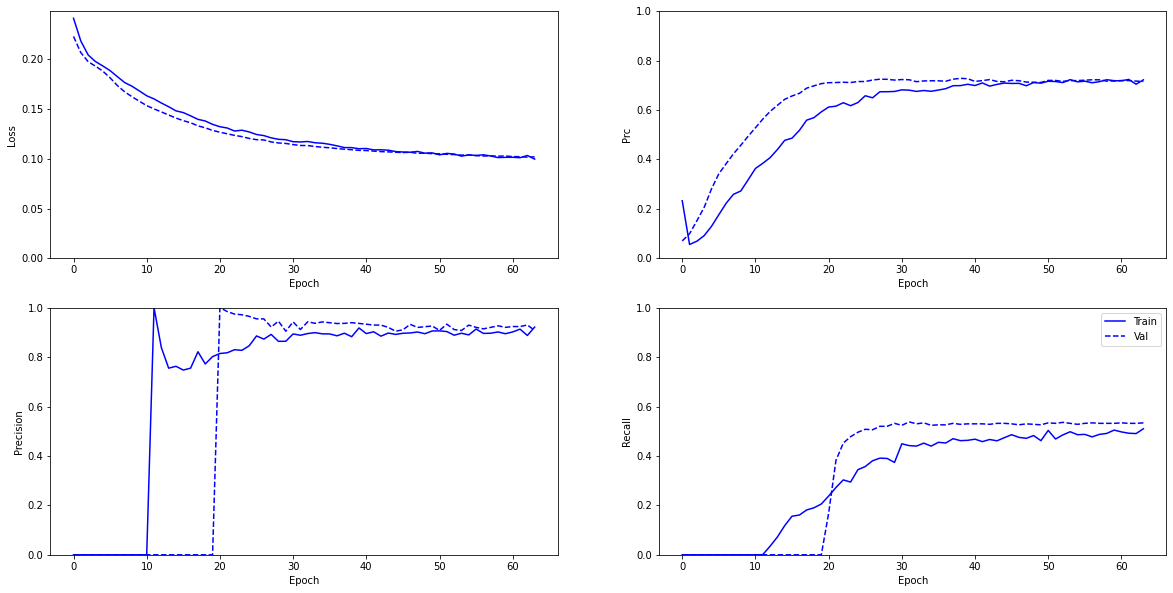

In [2496]:
plt.figure(figsize=(20,10))
plot_metrics(weighted_history)

In [2501]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
val_predictions_weighted = weighted_model.predict(val_features, batch_size=BATCH_SIZE)

In [2502]:
preds = np.where(val_predictions_weighted>=0.5, 1, 0)

In [2503]:
f1_score(y_val, preds)

0.6802547770700637

In [2504]:
# Make predictions for test data
preds = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
preds = np.where(preds>=0.5, 1, 0).flatten()
res = pd.concat([test_ids, pd.Series(preds, name='buy')], axis=1)
res.to_csv('submit-ann.csv', index=False)